In [94]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [95]:
x = [1.0,2.0,3.0]
y = [1.2,1.9,3.2]
def calcLogLikelihood(guess, true, n):
    error = np.array(true)-np.array(guess)
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

In [96]:
def myFunction(var):
    y_guess = []
    for i in range(0,3):
      c = var[1]*x[i] + var[0]
      y_guess.append(c)
    f = calcLogLikelihood(y_guess, y, float(len(y_guess)))
    return (-1*f)

In [97]:
nvar = 2
var = np.zeros(nvar)
var[0] = -20
var[1] = 23
from scipy.optimize import minimize
res = minimize(myFunction, var, method='BFGS',options={'disp': True})

Optimization terminated successfully.
         Current function value: -1.611219
         Iterations: 20
         Function evaluations: 156
         Gradient evaluations: 39


In [98]:
print(res)

      fun: -1.6112189085281368
 hess_inv: array([[ 0.04773174, -0.02045166],
       [-0.02045166,  0.01019154]])
      jac: array([-2.59280205e-06, -3.27825546e-07])
  message: 'Optimization terminated successfully.'
     nfev: 156
      nit: 20
     njev: 39
   status: 0
  success: True
        x: array([0.09999994, 1.00000002])


In [99]:
print(res['x'][0])

0.09999993837354683


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


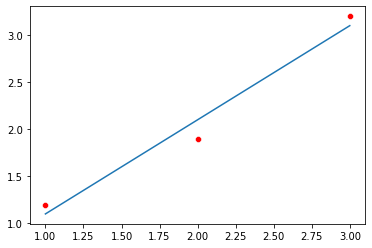

In [100]:
import seaborn as sns
%matplotlib inline
y_pred = []
for i in range(0,3):
  c = res['x'][1]*x[i] + res['x'][0]
  y_pred.append(c)

sns.scatterplot(x,y,color='red')
sns.lineplot(x,y_pred)